### Importing the necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

### Importing and Understanding the data

In [2]:
leads = pd.read_csv('Leads.csv')

In [3]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
leads.shape

(9240, 37)

In [5]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# Dropping columns 'Prospect ID' & 'Lead Number' because they do not hold any data useful for computation

leads = leads.drop('Prospect ID', axis=1)
leads = leads.drop('Lead Number', axis=1)
leads.shape

(9240, 35)

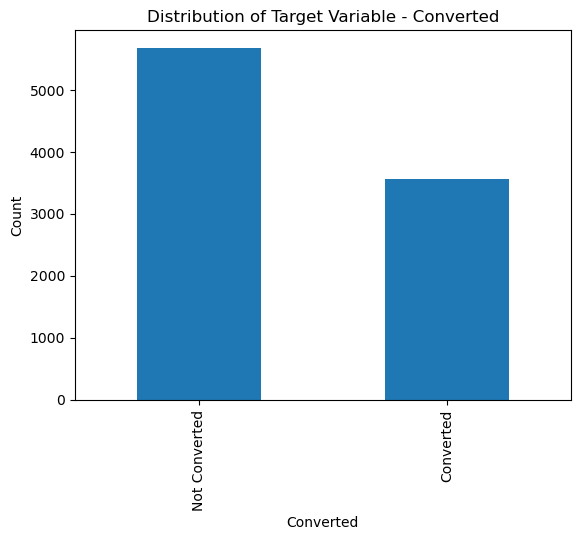

In [8]:
## Visualization of Target Variable 'Converted'

# Rename the target variable levels
leads['Converted'] = leads['Converted'].replace({0: 'Not Converted', 1: 'Converted'})

# Plotting a bar chart with the count of "Not Converted" and "Converted"
leads['Converted'].value_counts().plot.bar()

# Add labels and title
plt.xlabel('Converted')
plt.ylabel('Count')
plt.title('Distribution of Target Variable - Converted')

# Display the plot
plt.show()

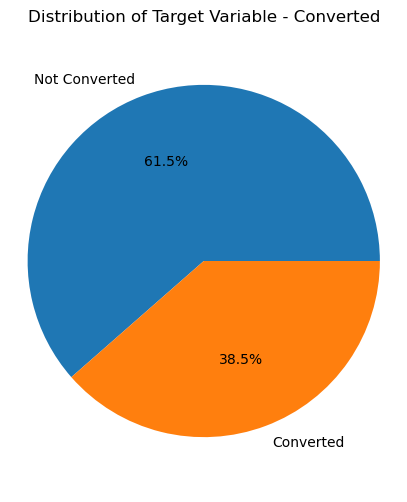

In [9]:
counts = leads['Converted'].value_counts()

# Create the pie chart
plt.figure(figsize=(5, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Distribution of Target Variable - Converted')
plt.axis('equal')  
plt.show()

In [10]:
# Again mapping 'Not Converted' to 0 and 'Converted' to 1 for further analysis

leads['Converted'] = leads['Converted'].replace({'Not Converted': 0, 'Converted': 1})

# Data Cleaning & Preparation

### Missing Value Imputation

In [11]:
# Checking the missing values

leads.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Score                      4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
I agree to pay the amount through cheque            0
A free copy of Mastering The

In [12]:
# Checking the missing values in percentage

round(100*(leads.isnull().sum().sort_values(ascending=False)/len(leads)),2)

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Score                      45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
I agree to pay the amount through cheque          0.00
A free cop

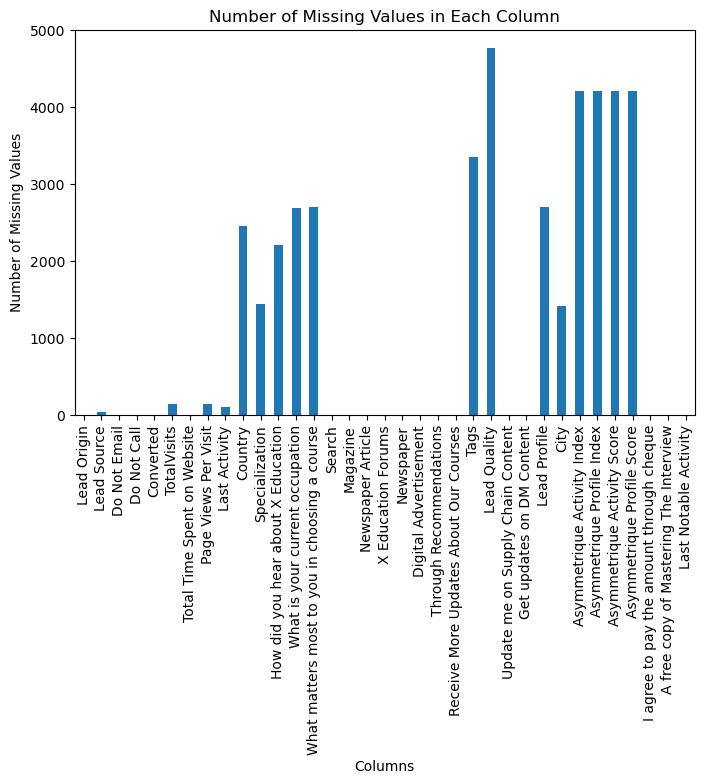

In [13]:
missing_values = leads.isnull().sum()

plt.figure(figsize=(8, 5))
missing_values.plot(kind='bar')
plt.title('Number of Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.show()

In [14]:
# Dropping the columns having more than 35% missing values

for i in leads.columns:
    if leads[i].isnull().sum()/len(leads)*100 > 35:
        leads = leads.drop(i, axis=1)

In [15]:
# Checking the missing values in percentage

round(100*(leads.isnull().sum().sort_values(ascending=False)/len(leads)),2)

Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
Lead Origin                                       0.00
Digital Advertisement                             0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Through Re

### Checking the value_counts and 'Select' option for every columns

In [16]:
# Checking value_counts for all columns

for i in leads:
    print(leads[i].value_counts())
    print('-'*50)

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
--------------------------------------------------
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64
--------------------------------------------------
No     8506
Yes     734
Name: Do Not Email, dtype: int64
--------------------------------------------------
No     9238
Yes     

### Dropping the columns wherein one level is dominating over the other by a huge margin. For e.g. dropping 'Do Not Call' column as there are 9238 No and only 2 Yes.

Dropping the following columns
- Do Not Call
- Search
- Magazine
- Newspaper Article
- X Education Forums
- What matters most to you in choosing a course
- Newspaper
- Digital Advertisement
- Through Recommendations
- Receive More Updates About Our Courses
- Update me on Supply Chain Content
- Get updates on DM Content
- I agree to pay the amount through cheque

In [17]:
cols = ['Do Not Call', 'Search', 'Magazine', 'Newspaper Article','X Education Forums', 'What matters most to you in choosing a course', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']

In [18]:
leads=leads.drop(cols, axis=1)

In [19]:
leads.shape

(9240, 16)

### Dropping below columns as they have majortity of the levels as 'Select'

- Lead Profile
- How did you hear about X Education

In [20]:
cols = ['Lead Profile', 'How did you hear about X Education']

In [21]:
leads = leads.drop(cols, axis=1)

In [22]:
leads.shape

(9240, 14)

### Dropping the below columns as they do not hold much importance (Since it is an online platform)

- Country
- City

In [23]:
cols = ['City', 'Country']

leads = leads.drop(cols, axis=1)
leads.shape

(9240, 12)

In [24]:
# Checking null values
leads.isnull().sum().sort_values(ascending=False)

What is your current occupation           2690
Specialization                            1438
TotalVisits                                137
Page Views Per Visit                       137
Last Activity                              103
Lead Source                                 36
Lead Origin                                  0
Do Not Email                                 0
Converted                                    0
Total Time Spent on Website                  0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

#### Even though the column 'What is your current occupation' holds 2690 missing values, we are not dropping the column as we have already dropped a lot of columns based on various other factors. In this case, we will be dropping the rows instead so that we can get a clean data

In [25]:
leads = leads[~pd.isnull(leads['What is your current occupation'])]

In [26]:
# Checking null values
leads.isnull().sum().sort_values(ascending=False)

TotalVisits                               130
Page Views Per Visit                      130
Last Activity                             103
Lead Source                                36
Specialization                             18
Lead Origin                                 0
Do Not Email                                0
Converted                                   0
Total Time Spent on Website                 0
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [27]:
## Dropping the rows having null values

leads = leads.dropna()

In [28]:
leads.isnull().sum().sort_values(ascending=False)

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [29]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6373 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             6373 non-null   object 
 1   Lead Source                             6373 non-null   object 
 2   Do Not Email                            6373 non-null   object 
 3   Converted                               6373 non-null   int64  
 4   TotalVisits                             6373 non-null   float64
 5   Total Time Spent on Website             6373 non-null   int64  
 6   Page Views Per Visit                    6373 non-null   float64
 7   Last Activity                           6373 non-null   object 
 8   Specialization                          6373 non-null   object 
 9   What is your current occupation         6373 non-null   object 
 10  A free copy of Mastering The Interview  6373 non-null   obje

In [30]:
## Checking the percentage of clean data againt the original rows

print(len(leads)/9240*100)

68.97186147186147


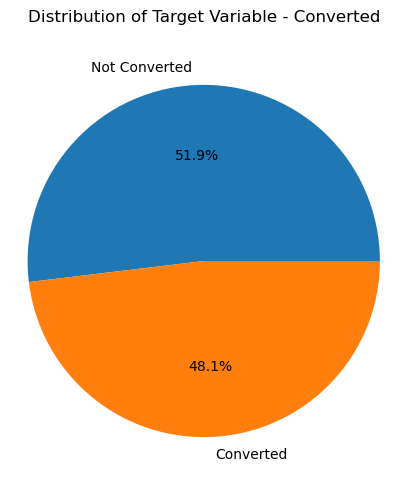

In [31]:
# Distribution of Target Variable - Converted post the cleaning of date

leads['Converted'] = leads['Converted'].replace({0: 'Not Converted', 1: 'Converted'})

counts = leads['Converted'].value_counts()



# Create the pie chart
plt.figure(figsize=(5, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Distribution of Target Variable - Converted')
plt.axis('equal')  
plt.show()

In [32]:
# Again mapping 'Not Converted' to 0 and 'Converted' to 1 for further analysis

leads['Converted'] = leads['Converted'].replace({'Not Converted': 0, 'Converted': 1})

### Almost 69% of clean data is available for carrying out further operations after data cleaning

## Dummy Variables

In [33]:
leads.head(3)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened


In [34]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6373 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             6373 non-null   object 
 1   Lead Source                             6373 non-null   object 
 2   Do Not Email                            6373 non-null   object 
 3   Converted                               6373 non-null   int64  
 4   TotalVisits                             6373 non-null   float64
 5   Total Time Spent on Website             6373 non-null   int64  
 6   Page Views Per Visit                    6373 non-null   float64
 7   Last Activity                           6373 non-null   object 
 8   Specialization                          6373 non-null   object 
 9   What is your current occupation         6373 non-null   object 
 10  A free copy of Mastering The Interview  6373 non-null   obje

In [35]:
cat_vars = leads.loc[:,leads.dtypes=='object']
cat_vars = cat_vars.drop('Specialization', axis=1)
cat_vars

,Lead Origin,Lead Source,Do Not Email,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,Page Visited on Website,Unemployed,No,Modified
1,API,Organic Search,No,Email Opened,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,Email Opened,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,Unreachable,Unemployed,No,Modified
4,Landing Page Submission,Google,No,Converted to Lead,Unemployed,No,Modified
...,...,...,...,...,...,...,...
9234,Landing Page Submission,Direct Traffic,No,SMS Sent,Unemployed,No,Modified
9235,Landing Page Submission,Direct Traffic,Yes,Email Marked Spam,Unemployed,No,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,No,SMS Sent,Unemployed,Yes,SMS Sent
9237,Landing Page Submission,Direct Traffic,Yes,SMS Sent,Unemployed,Yes,SMS Sent


In [36]:
cat_vars.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

#### Applying Dummy Variables to feature 'Specialization' seperately because they contain major values of level 'Select'. We will be removing the row of level 'Select' to ensure that machine does not learn data from that column


In [37]:
dummy_special = pd.get_dummies(leads['Specialization'], prefix='Specialization')
dummy_special = dummy_special.drop(['Specialization_Select'], 1)
leads = pd.concat([leads, dummy_special], axis=1)

In [38]:
## Applying Dummy Variables on other categorical variables

dummy = pd.get_dummies(leads[cat_vars.columns], drop_first=True)
dummy

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9234,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9235,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [39]:
## Concatinating 'Leads' and 'Dummy' Dataframe

leads = pd.concat([leads, dummy], axis=1)
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,...,0,0,0,1,0,0,0,0,0,0
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,...,1,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,1,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,...,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,...,0,0,0,1,0,0,0,0,0,0


In [40]:
## Dropping the original categorical variables

leads = leads.drop(cat_vars, axis=1)

In [41]:
leads = leads.drop('Specialization', axis=1)

In [42]:
leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


## Train Test Split

In [43]:
y = leads.pop('Converted')
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [44]:
X = leads
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [46]:
X_train.shape


(4461, 74)

In [47]:
X_test.shape

(1912, 74)

In [48]:
y_train.shape

(4461,)

In [49]:

y_test.shape

(1912,)

## Scaling

In [50]:
from sklearn.preprocessing import MinMaxScaler

In [51]:
num_vars = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [52]:
scaler = MinMaxScaler()
X_train[num_vars]=scaler.fit_transform(X_train[num_vars])

In [53]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
8003,0.015936,0.029489,0.125,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
218,0.015936,0.082306,0.250,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4171,0.023904,0.034331,0.375,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4037,0.000000,0.000000,0.000,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3660,0.000000,0.000000,0.000,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


## Coorelation between Variables

In [54]:
## Finding the correlation between variables

In [55]:
leads.corr()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
TotalVisits,1.000000,0.202551,0.489039,0.042269,0.035184,0.015248,0.019003,0.031922,0.027640,0.016549,...,0.026851,0.005896,0.026100,-0.088690,-0.004994,0.226728,-0.028923,0.002792,0.001631,0.010859
Total Time Spent on Website,0.202551,1.000000,0.303870,0.027925,0.051841,0.003934,-0.004325,0.060133,0.021332,0.026204,...,0.020082,0.005003,0.024632,-0.107230,-0.009837,0.035147,0.082950,0.010331,0.001504,-0.009888
Page Views Per Visit,0.489039,0.303870,1.000000,0.074643,0.034366,0.036748,0.039288,0.062656,0.031647,0.025231,...,0.048724,0.003003,0.015492,-0.075318,-0.042338,0.017507,0.031327,0.015233,0.028551,0.001096
"Specialization_Banking, Investment And Insurance",0.042269,0.027925,0.074643,1.000000,-0.047192,-0.017201,-0.023531,-0.075933,-0.029156,-0.024978,...,0.006623,-0.002615,0.025344,-0.019188,-0.015700,-0.003886,0.024111,-0.012283,-0.014591,-0.002615
Specialization_Business Administration,0.035184,0.051841,0.034366,-0.047192,1.000000,-0.018637,-0.025495,-0.082269,-0.031589,-0.027063,...,0.016994,-0.002833,0.005944,-0.035958,-0.011402,0.018827,0.019365,-0.013308,0.005159,-0.002833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Last Notable Activity_Page Visited on Website,0.226728,0.035147,0.017507,-0.003886,0.018827,0.006002,0.002558,0.011141,-0.019607,0.007340,...,-0.127499,-0.002329,-0.008407,-0.123332,-0.020429,1.000000,-0.119786,-0.010944,-0.013001,-0.002329
Last Notable Activity_SMS Sent,-0.028923,0.082950,0.031327,0.024111,0.019365,-0.027832,0.004763,0.004843,0.010618,-0.015756,...,-0.441685,-0.008070,-0.029124,-0.427251,-0.070769,-0.119786,1.000000,-0.037914,-0.045037,-0.008070
Last Notable Activity_Unreachable,0.002792,0.010331,0.015233,-0.012283,-0.013308,-0.004851,0.017393,0.053524,0.011301,-0.007044,...,-0.040355,-0.000737,-0.002661,-0.039036,-0.006466,-0.010944,-0.037914,1.000000,-0.004115,-0.000737
Last Notable Activity_Unsubscribed,0.001631,0.001504,0.028551,-0.014591,0.005159,0.021787,-0.007883,0.002640,0.023150,0.010746,...,-0.047937,-0.000876,-0.003161,-0.046371,-0.007681,-0.013001,-0.045037,-0.004115,1.000000,-0.000876


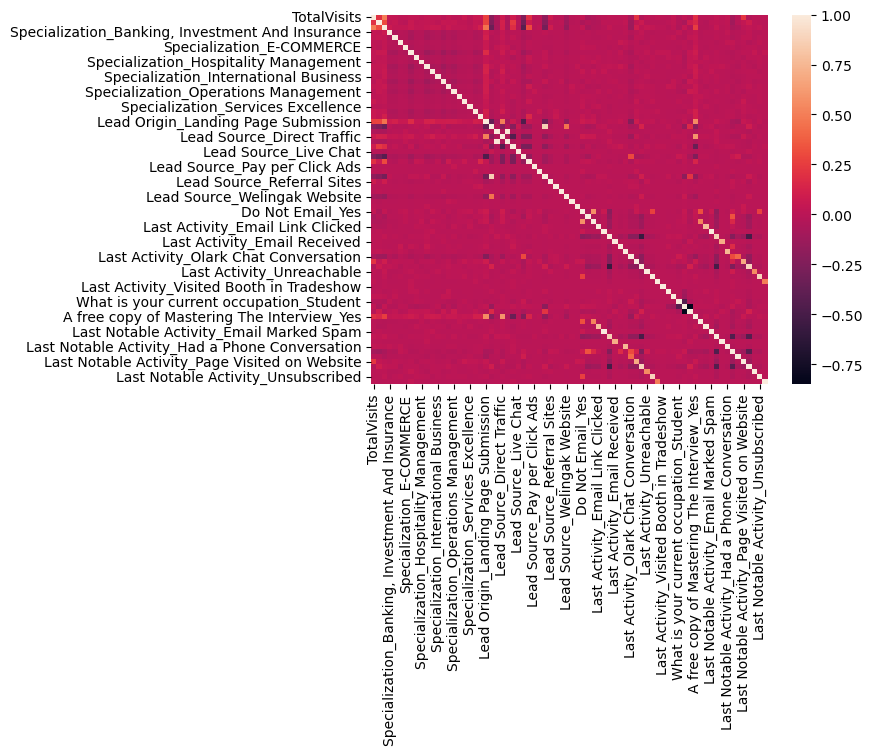

In [56]:
sns.heatmap(leads.corr())
plt.show()

### Due to the high number of variables, it woud not be effective to view the correlation via Heatmap and hence we will have to proceed with building the model using RFE, p-values and VIF

## Model Building

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

### Building the model using RFE and selecting the top 15 features

In [58]:
logreg = LogisticRegression()

In [59]:
rfe = RFE(logreg, n_features_to_select= 15)
rfe = rfe.fit(X_train, y_train)

In [60]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 23),
 ('Specialization_Banking, Investment And Insurance', False, 6),
 ('Specialization_Business Administration', False, 15),
 ('Specialization_E-Business', False, 11),
 ('Specialization_E-COMMERCE', False, 9),
 ('Specialization_Finance Management', False, 14),
 ('Specialization_Healthcare Management', False, 10),
 ('Specialization_Hospitality Management', False, 55),
 ('Specialization_Human Resource Management', False, 16),
 ('Specialization_IT Projects Management', False, 18),
 ('Specialization_International Business', False, 22),
 ('Specialization_Marketing Management', False, 12),
 ('Specialization_Media and Advertising', False, 21),
 ('Specialization_Operations Management', False, 19),
 ('Specialization_Retail Management', False, 30),
 ('Specialization_Rural and Agribusiness', False, 7),
 ('Specialization_Services Excellence', False, 56),
 ('Specialization_Supply Chain Management

In [61]:
cols = X_train.columns[rfe.support_]
cols

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Had a Phone Conversation',
       'Last Activity_SMS Sent', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

### Since 15 features have been selected using RFE, rest of the features can be eliminated using p-value anb VIF

In [62]:
import statsmodels.api as sm

In [63]:
# Selecting only those columns in training dataset that was selected using RFE

X_train = X_train[cols]

In [64]:
X_train_sm = sm.add_constant(X_train)
lr1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
lr1 = lr1.fit()
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2072.8
Date:                Tue, 18 Jun 2024   Deviance:                       4145.5
Time:                        20:27:25   Pearson chi2:                 4.84e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3660
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0061      0.600     -1.677      0.094      -2.182       0.170
TotalVisits                                             11.3439      2.682      4.230      0.000       6.088      16.600
Total Time Spent on Website                              4.4312      0.185     23.924      0.000       4.068       4.794
Lead Origin_Lead Add Form                                2.9483      1.191      2.475      0.013       0.614       5.283
Lead Source_Olark Chat                                   1.4584      0.122     11.962      0.000       1.219       1.697
Lead Source_Reference                                    1.2994      1.214      1.070      0.285      -1.080       3.679
Lead Source_Welingak Website                             3.4159      1.558      2.192      0.028       0.362       6.470
Do Not Email_Yes                                        -1.5053      0.193     -7.781      0.000      -1.884      -1.126
Last Activity_Had a Phone Conversation                   1.0397      0.983      1.058      0.290      -0.887       2.966
Last Activity_SMS Sent                                   1.1827      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Housewife               22.6492   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1544      0.630     -1.831      0.067      -2.390       0.081
What is your current occupation_Unemployed              -1.3395      0.594     -2.254      0.024      -2.505      -0.175
What is your current occupation_Working Professional     1.2743      0.623      2.045      0.041       0.053       2.496
Last Notable Activity_Had a Phone Conversation          23.1932   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Unreachable                        2.7868      0.807      3.453      0.001       1.205       4.369
========================================================================================================================
"""

In [65]:
# Checking the VIF as well to check the multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,84.19
4,Lead Source_Reference,65.18
5,Lead Source_Welingak Website,20.03
11,What is your current occupation_Unemployed,3.65
7,Last Activity_Had a Phone Conversation,2.44
13,Last Notable Activity_Had a Phone Conversation,2.43
1,Total Time Spent on Website,2.38
0,TotalVisits,1.62
8,Last Activity_SMS Sent,1.59
12,What is your current occupation_Working Profes...,1.56


#### Removing 'Lead Source_Reference' feature as it has high p-value and high VIF

In [66]:
X_train = X_train.drop('Lead Source_Reference', axis=1)
X_train.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
8003,0.015936,0.029489,0,0,0,0,0,1,0,0,1,0,0,0
218,0.015936,0.082306,0,0,0,0,0,0,0,0,1,0,0,0
4171,0.023904,0.034331,0,0,0,0,0,0,0,0,1,0,0,0
4037,0.000000,0.000000,0,1,0,0,0,0,0,0,1,0,0,0
3660,0.000000,0.000000,1,0,0,0,0,1,0,0,1,0,0,0


In [67]:
## Refitting the model again with remaining features and checking p-values & VIF

lr2 = sm.GLM(y_train, sm.add_constant(X_train), family = sm.families.Binomial())
lr2 = lr2.fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2073.2
Date:                Tue, 18 Jun 2024   Deviance:                       4146.5
Time:                        20:27:25   Pearson chi2:                 4.82e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3658
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0057      0.600     -1.677      0.094      -2.181       0.170
TotalVisits                                             11.3428      2.682      4.229      0.000       6.086      16.599
Total Time Spent on Website                              4.4312      0.185     23.924      0.000       4.068       4.794
Lead Origin_Lead Add Form                                4.2084      0.259     16.277      0.000       3.702       4.715
Lead Source_Olark Chat                                   1.4583      0.122     11.960      0.000       1.219       1.697
Lead Source_Welingak Website                             2.1557      1.037      2.079      0.038       0.124       4.188
Do Not Email_Yes                                        -1.5036      0.193     -7.779      0.000      -1.882      -1.125
Last Activity_Had a Phone Conversation                   1.0398      0.983      1.058      0.290      -0.887       2.966
Last Activity_SMS Sent                                   1.1827      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Housewife               22.6511   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1537      0.630     -1.830      0.067      -2.389       0.082
What is your current occupation_Unemployed              -1.3401      0.594     -2.255      0.024      -2.505      -0.175
What is your current occupation_Working Professional     1.2748      0.623      2.046      0.041       0.053       2.496
Last Notable Activity_Had a Phone Conversation          23.1934   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Unreachable                        2.7872      0.807      3.454      0.001       1.205       4.369
========================================================================================================================
"""

In [68]:
# Checking the VIF for lr2 model

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,3.65
6,Last Activity_Had a Phone Conversation,2.44
12,Last Notable Activity_Had a Phone Conversation,2.43
1,Total Time Spent on Website,2.38
2,Lead Origin_Lead Add Form,1.71
0,TotalVisits,1.62
7,Last Activity_SMS Sent,1.59
11,What is your current occupation_Working Profes...,1.56
3,Lead Source_Olark Chat,1.44
4,Lead Source_Welingak Website,1.33


### VIF of all the features is less than 5. Hence we need to refer the p-value now and based on that we are dropping feature 'Last Notable Activity_Had a Phone Conversation' as it has a high p-value

In [69]:
X_train = X_train.drop('Last Notable Activity_Had a Phone Conversation', axis=1)

In [70]:
# Refitting the model again and checking the stats

lr3 = sm.GLM(y_train, sm.add_constant(X_train), family = sm.families.Binomial())
lr3 = lr3.fit()
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2076.1
Date:                Tue, 18 Jun 2024   Deviance:                       4152.2
Time:                        20:27:26   Pearson chi2:                 4.82e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3650
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0069      0.600     -1.679      0.093      -2.182       0.168
TotalVisits                                             11.4551      2.686      4.265      0.000       6.191      16.720
Total Time Spent on Website                              4.4237      0.185     23.900      0.000       4.061       4.787
Lead Origin_Lead Add Form                                4.2082      0.259     16.276      0.000       3.701       4.715
Lead Source_Olark Chat                                   1.4581      0.122     11.958      0.000       1.219       1.697
Lead Source_Welingak Website                             2.1557      1.037      2.079      0.038       0.124       4.188
Do Not Email_Yes                                        -1.5037      0.193     -7.780      0.000      -1.882      -1.125
Last Activity_Had a Phone Conversation                   2.7502      0.802      3.430      0.001       1.179       4.322
Last Activity_SMS Sent                                   1.1826      0.082     14.364      0.000       1.021       1.344
What is your current occupation_Housewife               21.6525   1.49e+04      0.001      0.999   -2.91e+04    2.91e+04
What is your current occupation_Student                 -1.1520      0.630     -1.828      0.068      -2.387       0.083
What is your current occupation_Unemployed              -1.3385      0.594     -2.253      0.024      -2.503      -0.174
What is your current occupation_Working Professional     1.2743      0.623      2.045      0.041       0.053       2.495
Last Notable Activity_Unreachable                        2.7862      0.807      3.453      0.001       1.205       4.368
========================================================================================================================
"""

### Dropping the column 'What is your current occupation_Housewife'

In [71]:
X_train = X_train.drop('What is your current occupation_Housewife', axis=1)

In [72]:
# Refitting the model again and checking the stats

lr4 = sm.GLM(y_train, sm.add_constant(X_train), family = sm.families.Binomial())
lr4 = lr4.fit()
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2078.3
Date:                Tue, 18 Jun 2024   Deviance:                       4156.7
Time:                        20:27:26   Pearson chi2:                 4.83e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3644
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4528      0.554     -0.818      0.413      -1.538       0.632
TotalVisits                                             11.2586      2.672      4.214      0.000       6.023      16.495
Total Time Spent on Website                              4.4217      0.185     23.898      0.000       4.059       4.784
Lead Origin_Lead Add Form                                4.2057      0.258     16.274      0.000       3.699       4.712
Lead Source_Olark Chat                                   1.4530      0.122     11.930      0.000       1.214       1.692
Lead Source_Welingak Website                             2.1541      1.037      2.078      0.038       0.122       4.186
Do Not Email_Yes                                        -1.5063      0.193     -7.785      0.000      -1.886      -1.127
Last Activity_Had a Phone Conversation                   2.7515      0.802      3.432      0.001       1.180       4.323
Last Activity_SMS Sent                                   1.1823      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Student                 -1.7017      0.588     -2.893      0.004      -2.855      -0.549
What is your current occupation_Unemployed              -1.8879      0.550     -3.435      0.001      -2.965      -0.811
What is your current occupation_Working Professional     0.7246      0.581      1.248      0.212      -0.413       1.862
Last Notable Activity_Unreachable                        2.7834      0.807      3.448      0.001       1.201       4.365
========================================================================================================================
"""

### Dropping the column 'What is your current occupation_Working Professional'

In [73]:
X_train = X_train.drop('What is your current occupation_Working Professional', axis=1)

In [74]:
lr5 = sm.GLM(y_train, sm.add_constant(X_train), family = sm.families.Binomial())
lr5 = lr5.fit()
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2079.1
Date:                Tue, 18 Jun 2024   Deviance:                       4158.1
Time:                        20:27:26   Pearson chi2:                 4.80e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3642
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.2040      0.196      1.043      0.297      -0.179       0.587
TotalVisits                                   11.1489      2.665      4.184      0.000       5.926      16.371
Total Time Spent on Website                    4.4223      0.185     23.899      0.000       4.060       4.785
Lead Origin_Lead Add Form                      4.2051      0.258     16.275      0.000       3.699       4.712
Lead Source_Olark Chat                         1.4526      0.122     11.934      0.000       1.214       1.691
Lead Source_Welingak Website                   2.1526      1.037      2.076      0.038       0.121       4.185
Do Not Email_Yes                              -1.5037      0.193     -7.774      0.000      -1.883      -1.125
Last Activity_Had a Phone Conversation         2.7552      0.802      3.438      0.001       1.184       4.326
Last Activity_SMS Sent                         1.1856      0.082     14.421      0.000       1.024       1.347
What is your current occupation_Student       -2.3578      0.281     -8.392      0.000      -2.908      -1.807
What is your current occupation_Unemployed    -2.5445      0.186    -13.699      0.000      -2.908      -2.180
Last Notable Activity_Unreachable              2.7846      0.807      3.449      0.001       1.202       4.367
==============================================================================================================
"""

In [75]:
# All the p-values seems to be okay. Checking via VIF if any feature is still having high VIF

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,2.82
1,Total Time Spent on Website,2.00
0,TotalVisits,1.54
7,Last Activity_SMS Sent,1.51
2,Lead Origin_Lead Add Form,1.45
3,Lead Source_Olark Chat,1.33
4,Lead Source_Welingak Website,1.30
5,Do Not Email_Yes,1.08
8,What is your current occupation_Student,1.06
6,Last Activity_Had a Phone Conversation,1.01


# Model Evaluation

In [76]:
# Using 'predict' function to predict the probabilities on the train set

y_train_pred = lr5.predict(sm.add_constant(X_train))
y_train_pred

8003    0.300117
218     0.142002
4171    0.127629
4037    0.291558
3660    0.954795
          ...   
8759    0.954795
100     0.759334
5877    0.909280
8658    0.208249
8217    0.370186
Length: 4461, dtype: float64

In [77]:
# Reshaping y_train_pred into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.30011695, 0.14200165, 0.12762885, 0.29155814, 0.95479546,
       0.19442563, 0.17807328, 0.94946006, 0.07599465, 0.98231619])

In [78]:
## Creating a DataFrame with actual Converted variable and Converted_prob variable

y_train_pred_final = pd.DataFrame()
y_train_pred_final['Converted'] = y_train.values
y_train_pred_final['Converted_prob']  = y_train_pred
y_train_pred_final

,Converted,Converted_prob
0,0,0.300117
1,0,0.142002
2,1,0.127629
3,1,0.291558
4,1,0.954795
...,...,...
4456,1,0.954795
4457,0,0.759334
4458,0,0.909280
4459,0,0.208249


In [79]:
#### Creating new column 'Predicted' with 1 if Converted_prob > 0.5 else 0.

y_train_pred_final['Predicted'] = y_train_pred_final['Converted_prob'].apply(lambda x : 1 if x>0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Predicted
0,0,0.300117,0
1,0,0.142002,0
2,1,0.127629,0
3,1,0.291558,0
4,1,0.954795,1


In [80]:
## Evaluating the model based on the Predicted threshold of 0.5

from sklearn import metrics


In [81]:
## Creating confusion matrix

from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)
print(confusion)

[[1929  383]
 [ 560 1589]]


In [82]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [83]:
## Checking the Accuracy

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Predicted)
accuracy

0.7886124187401928

In [84]:
## Checking the Sensitivity

sensitivity = TP/(TP+FN)
sensitivity

0.739413680781759

In [85]:
## Checking the Specificity

specificity = TN/(TN+FP)
specificity

0.8343425605536332

### Checking the ideal Cut-off

In [86]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [87]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted,
                                         y_train_pred_final.Converted_prob,
                                         drop_intermediate=False)

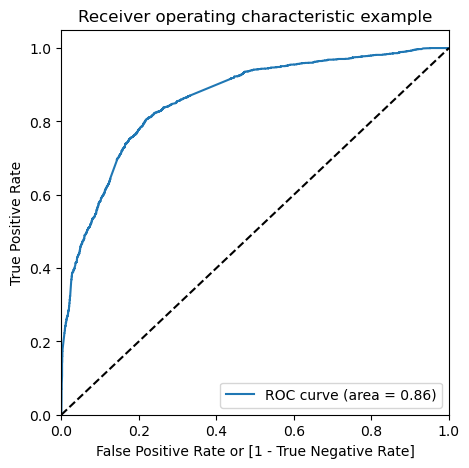

In [88]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### Area under ROC curve is 0.86 which seems to be good but we need to need to check what should be the ideal cut off as the area under ROC curve is still for arbitrary figure i.e. 0.5

In [89]:
## Creating columns with different probability cutoffs

numbers = [float(x) / 10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.300117,0,1,1,1,1,0,0,0,0,0,0
1,0,0.142002,0,1,1,0,0,0,0,0,0,0,0
2,1,0.127629,0,1,1,0,0,0,0,0,0,0,0
3,1,0.291558,0,1,1,1,0,0,0,0,0,0,0
4,1,0.954795,1,1,1,1,1,1,1,1,1,1,1


In [90]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at
# different values of probabiity cutoffs

cutoff_df = pd.DataFrame(columns=['prob', 'accuracy', 'sensi', 'speci'])

num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted,
                                   y_train_pred_final[i])
    total1 = sum(sum(cm1))
    accuracy = (cm1[0, 0] + cm1[1, 1]) / total1

    speci = cm1[0, 0] / (cm1[0, 0] + cm1[0, 1])
    sensi = cm1[1, 1] / (cm1[1, 0] + cm1[1, 1])
    cutoff_df.loc[i] = [i, accuracy, sensi, speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.481731  1.000000  0.000000
0.1   0.1  0.527012  0.994416  0.092561
0.2   0.2  0.698274  0.944160  0.469723
0.3   0.3  0.767541  0.865984  0.676038
0.4   0.4  0.791975  0.810610  0.774654
0.5   0.5  0.788612  0.739414  0.834343
0.6   0.6  0.757229  0.624011  0.881055
0.7   0.7  0.735037  0.543509  0.913062
0.8   0.8  0.711500  0.453234  0.951557
0.9   0.9  0.644026  0.279665  0.982699


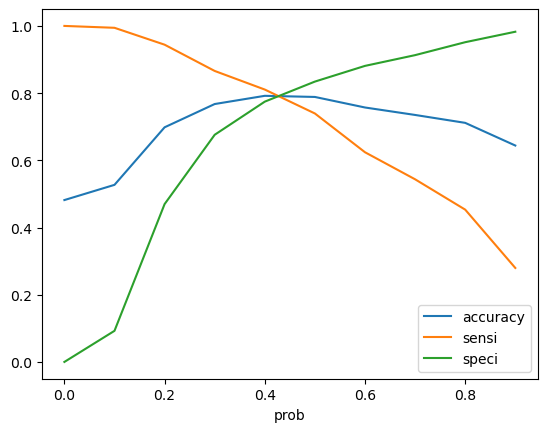

In [91]:
# Plotting the above result

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### All the 3 metrics are intersecting at 0.42. Hence choosing the value 0.42 as the threshold

In [92]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.42 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.300117,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.142002,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.127629,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.291558,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.954795,1,1,1,1,1,1,1,1,1,1,1,1


In [93]:
# Checking the confusion Matrix

confusion2 = confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.final_predicted)
print(confusion)

[[1929  383]
 [ 560 1589]]


In [94]:
TP = confusion2[1, 1] 
TN = confusion2[0, 0] 
FP = confusion2[0, 1]
FN = confusion2[1, 0] 

In [95]:
# Checking the accuracy with the threshold 0.42

accuracy = metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.final_predicted)
accuracy

0.7908540685944856

In [96]:
## Checking Sensivity

sensivity = TP/(TP+FN)
sensivity

0.793392275476966

In [97]:
## Checking Specificity

specificity = TN/(TN+FP)
specificity

0.7884948096885813

### The Cut-off of 0.42 seems to be generating good results for training set. Hence checking the same on test set and deriving the metrics

## Making predictions on the Test set

In [98]:
## Scaling the numerical variables of the test set using just 'transform'

X_test[num_vars] = scaler.transform(X_test[num_vars])

In [99]:
## Selecting the columns in X_test that were selected using RFE for X_train

X_test = X_test[cols]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
4771,0.000000,0.000000,1,0,1,0,0,0,1,0,0,0,1,0,0
6122,0.027888,0.029049,0,0,0,0,0,0,0,0,0,1,0,0,0
9202,0.015936,0.416813,0,0,0,0,0,0,1,0,0,1,0,0,0
6570,0.011952,0.378961,0,0,0,0,1,0,1,0,0,1,0,0,0
2668,0.031873,0.395246,0,0,0,0,0,0,1,0,0,1,0,0,0


In [100]:
## Adding a constant to X_test

X_test_sm = sm.add_constant(X_test[cols])

In [101]:
# Dropping the columns in X_test that were dropped from X_train while fitting the model 
X_test.drop(['Lead Source_Reference', 'What is your current occupation_Housewife','What is your current occupation_Working Professional','Last Notable Activity_Had a Phone Conversation'],1,inplace=True)

In [102]:
## Making predictions on the test set

y_test_pred = lr5.predict(sm.add_constant(X_test))

In [103]:
y_test_pred[:10]

4771    0.996296
6122    0.129992
9202    0.703937
6570    0.299564
2668    0.720796
4233    0.792250
3368    0.704038
9091    0.464521
5972    0.282978
3631    0.786460
dtype: float64

In [104]:
## Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [105]:
## Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [106]:
## Remove index for both dataframes to append them side by side

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [107]:
## Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [108]:
y_pred_final.head()

,Converted,0
0,1,0.996296
1,0,0.129992
2,0,0.703937
3,1,0.299564
4,1,0.720796


In [109]:
y_pred_final= y_pred_final.rename(columns = {0 : 'Converted_prob'})

In [110]:
y_pred_final.head()

,Converted,Converted_prob
0,1,0.996296
1,0,0.129992
2,0,0.703937
3,1,0.299564
4,1,0.720796


In [111]:
## Making predictions on the test set using 0.42 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.42 else 0)

In [112]:
y_pred_final.head()

,Converted,Converted_prob,final_predicted
0,1,0.996296,1
1,0,0.129992,0
2,0,0.703937,1
3,1,0.299564,0
4,1,0.720796,1


In [113]:
# Checking the accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7845188284518828

In [114]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'],y_pred_final.final_predicted)
confusion2

array([[786, 210],
       [202, 714]], dtype=int64)

In [115]:
TP = confusion2[1, 1]  
TN = confusion2[0, 0]  
FP = confusion2[0, 1] 
FN = confusion2[1, 0] 

In [116]:
# Checking sensitivity

TP / float(TP+FN)

0.7794759825327511

In [117]:
# Checking specificity

TN / float(TN+FP)

0.7891566265060241

### The metrics on the Test set seems to be in sync with that of the Training Set. So, it seems that we have made a good model that is being supported by the metrics of Sensitivity, Specificity & Accuracy. But let us also check the same using the Precision and Recall metrics

### Checking the Metrics on the Train Set

In [118]:
# Checking the confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)
confusion

array([[1929,  383],
       [ 560, 1589]], dtype=int64)

In [119]:
# Checking the Precision

confusion[1, 1] / (confusion[0, 1] + confusion[1, 1])

0.8057809330628803

In [120]:
# Checking the Recall

confusion[1, 1] / (confusion[1, 0] + confusion[1, 1])

0.739413680781759

### Checking the ideal tradeoff between Precision and Recall

In [121]:
from sklearn.metrics import precision_recall_curve

In [122]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4456    1
 4457    0
 4458    0
 4459    0
 4460    0
 Name: Converted, Length: 4461, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 4456    1
 4457    1
 4458    1
 4459    0
 4460    0
 Name: Predicted, Length: 4461, dtype: int64)

In [123]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final.Converted_prob)

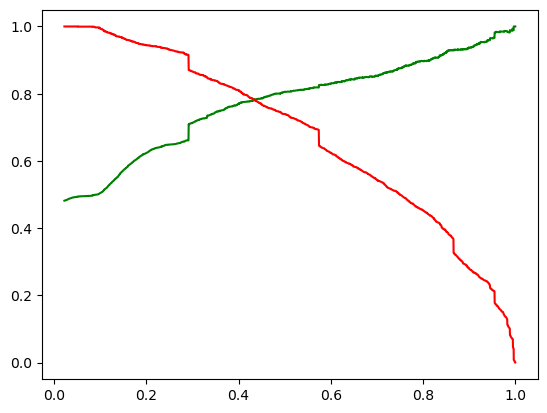

In [124]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [125]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.44 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.300117,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.142002,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.127629,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.291558,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.954795,1,1,1,1,1,1,1,1,1,1,1,1


In [126]:
## Checking the accuracy

metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.final_predicted)

0.7895090786819099

In [127]:
# Checking the confusion Matrix

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.final_predicted)
confusion2

array([[1852,  460],
       [ 479, 1670]], dtype=int64)

In [128]:
TP = confusion2[1,1]
TN = confusion2[0,0]
FP = confusion2[0,1] 
FN = confusion2[1,0] 

In [129]:
# Checking Precision

TP/(TP+FP)

0.784037558685446

In [130]:
# Checking Recall

TP/(TP+FN)

0.7771056305258259

### Checking the performance on the Test set

In [131]:
# Making predictions on the test set

y_test_pred = lr5.predict(sm.add_constant(X_test))

In [132]:
y_test_pred[:10]

4771    0.996296
6122    0.129992
9202    0.703937
6570    0.299564
2668    0.720796
4233    0.792250
3368    0.704038
9091    0.464521
5972    0.282978
3631    0.786460
dtype: float64

In [133]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [134]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [135]:
# Removing index for both dataframes to append them side by side

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [136]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [137]:
y_pred_final.head()

,Converted,0
0,1,0.996296
1,0,0.129992
2,0,0.703937
3,1,0.299564
4,1,0.720796


In [138]:
# Renaming the column

y_pred_final = y_pred_final.rename(columns={0: 'Converted_prob'})

In [139]:
y_pred_final.head()

,Converted,Converted_prob
0,1,0.996296
1,0,0.129992
2,0,0.703937
3,1,0.299564
4,1,0.720796


In [140]:
## Making predictions on the test set using 0.44 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.44 else 0)

In [141]:
y_pred_final.head()

,Converted,Converted_prob,final_predicted
0,1,0.996296,1
1,0,0.129992,0
2,0,0.703937,1
3,1,0.299564,0
4,1,0.720796,1


In [142]:
# Checking the accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7866108786610879

In [143]:
# Confusion Matrix
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[801, 195],
       [213, 703]], dtype=int64)

In [144]:
TP = confusion2[1, 1]
TN = confusion2[0, 0] 
FP = confusion2[0, 1] 
FN = confusion2[1, 0]

In [145]:
# Checking the Precision

TP/(TP+FP)

0.7828507795100222

In [146]:
# Checking the Recall

TP/(TP+FN)

0.767467248908297

## Sentivity - Specificity Metrics at threshold of 0.42

#### Accuracy
- Training Set - 79.08
- Test Set - 78.45

#### Sensitivity
- Training Set - 79.33
- Test Set - 77.95

#### Specificity
- Training Set - 78.84
- Test Set - 78.91

## Precision - Recall Metrics at threshold of 0.42

#### Accuracy
- Training Set - 78.95
- Test Set - 78.66

#### Precision
- Training Set - 78.40
- Test Set - 78.28

#### Recall
- Training Set - 77.71
- Test Set - 76.75

## It is clear that the model we have build is showing the same result on Test set as it was showing the result on Training Set -  Based on both Sensitivity-Specificity view and Precision-Recall view. Hence the performance of the model is good